In [1]:
from datetime import date, timedelta, datetime

from Stock import *

s = date(2020,1,1)
e = date(2021,12,20)
tesla = Stock("tsla")
tesla.load_data()
#tesla.add_data_range(s,e,stockpath='pricedata/tsla.csv')
#tesla.save_data()

done loading $tsla data.


In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
  
warnings.filterwarnings(action = 'ignore')
  
import gensim
from gensim.models import Word2Vec
import seaborn as sns

In [3]:
data = []
for j in tesla.df['text'].values:
    temp = [i.lower() for i in word_tokenize(j)]
    data.append(temp)

In [4]:
model1 = gensim.models.Word2Vec(data, min_count = 1, 
                              size = 1000, window = 5, workers=5, sg=1)

In [5]:
word1 = "good"
word2 = "bad"
print("Cosine similarity between '{}' and '{}'".format(word1,word2),
    model1.similarity(word1, word2))

Cosine similarity between 'good' and 'bad' 0.66275775


In [6]:
model1.most_similar('germany')[:5]

[('hungary', 0.6843369007110596),
 ('portugal', 0.6758784055709839),
 ('austria', 0.6675060391426086),
 ('greece', 0.6674923896789551),
 ('poland', 0.6661850810050964)]

In [7]:
tempdf = tesla.df.copy()
tempdf['label'] = tempdf.apply(
    lambda row : int(row.percent_change > 0)
    ,axis=1)
tempdf.loc[tempdf['percent_change'].isna(), 'label'] = np.nan

<AxesSubplot:>

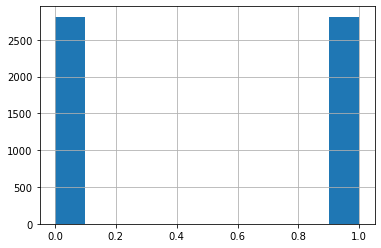

In [8]:
tempdf['label'].hist()

In [9]:
def word_vectorize(wd):
    if wd in model1.wv.vocab:
        return model1[wd.lower()]
    else:
        return np.zeros(1000)*np.nan
def mean_vectorize(tx):
    temp = np.nanmean([word_vectorize(i) for i in word_tokenize(tx)],axis=0).tolist()
    return temp
dataset = tempdf.dropna()
inputs = dataset[['text']].apply(
    lambda row : mean_vectorize(row.text)
    ,axis=1).tolist()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, dataset['label'].astype(int), test_size=0.3, shuffle=True)

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,)
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9801778907242694
0.5358624777711914


In [36]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=1000, tol=1e-5,shuffle=True)
sgd.fit(X_train, y_train)
print(sgd.score(X_train,y_train))
print(sgd.score(X_test,y_test))

0.5588310038119441
0.5103734439834025


In [31]:
from sklearn.svm import SVC
vm = SVC()
vm.fit(X_train,y_train)
print(vm.score(X_train,y_train))
print(vm.score(X_test,y_test))

0.5316391359593393
0.5020746887966805


In [25]:
tesla.load_data()
tesla.add_data(date.today()-timedelta(days=0))
inputs = tesla.get_data(date.today()-timedelta(days=0))[['text']].apply(
    lambda row : mean_vectorize(row.text)
    ,axis=1).tolist()

done loading $tsla data.


In [37]:
# 0 is decrease, 1 is increase
print(clf.predict(inputs))
print(sgd.predict(inputs))
print(vm.predict(inputs))

[1 0 1 1 1 0 1 1 1 1]
[1 1 1 1 1 1 1 1 1 0]
[1 1 1 1 0 0 0 1 1 0]


In [27]:
tesla.get_data(date.today()-timedelta(days=0))

,tag,date,link,percent_change,text
7988,tsla,2021-12-29,https://www.reuters.com/business/teslas-musk-c...,NaN,Tesla CEO Elon Musk attends the Tesla Shanghai...
7989,tsla,2021-12-29,https://www.cnn.com/2021/12/29/investing/elon-...,NaN,New York CNN BusinessElon Musk appears to have...
7990,tsla,2021-12-29,https://www.mercurynews.com/2021/12/29/musk-ne...,NaN,Elon Musk sold a further billion of Tesla Inc ...
7991,tsla,2021-12-29,https://electrek.co/2021/12/29/tesla-sponsorin...,NaN,Tesla is going to start sponsoring Formula SAE...
7992,tsla,2021-12-29,https://cnevpost.com/2021/12/29/tesla-exec-say...,NaN,Subsidy rollbacks wont mean less competitivene...
7993,tsla,2021-12-29,https://www.usatoday.com/story/tech/2021/12/29...,NaN,Hit play on the player above to hear the podca...
7994,tsla,2021-12-29,https://auto.hindustantimes.com/auto/cars/watc...,NaN,Tesla is synonymous with innovations and disru...
7995,tsla,2021-12-29,https://www.taiwannews.com.tw/en/news/4391914,NaN,Tesla CEO Elon Musk attends the Tesla Shanghai...
7996,tsla,2021-12-29,https://teslanorth.com/2021/12/29/best-tesla-l...,NaN,Tesla expanded its holiday Light Show feature ...
7997,tsla,2021-12-29,https://nypost.com/2021/12/29/elon-musk-addres...,NaN,Tesla CEO Elon Musk has weighed in with his th...


In [43]:
tesla.df.iloc[7988+4]['text']

'Subsidy rollbacks wont mean less competitiveness for NEVs but will instead promote a more mature industry said Grace Tao Teslas global vice president Chinas subsidies for new energy vehicles NEVs are about to be slashed in a few days and in the view of a Tesla China executive thats actually a good thing for the industry With strong support from the government the NEV industry is growing rapidly Rather than making NEVs less competitive the subsidy rollback will promote a more mature industry said Grace Tao Teslas global vice president Tao said this in a recent interview with The Beijing News saying that competition in NEVs will enter a stage where it will really rely on product strength according to a text of the interview Chinas Ministry of Finance released plans on April that the subsidies offered for NEVs would be scaled back each year calling for the amount of subsidies to be reduced by percent percent and percent each year from respectively from the previous year The subsidies ava